In [1]:
# conda install poppler
# pip install papermage
from papermage.recipes import CoreRecipe

recipe = CoreRecipe()
# doc = recipe.run("tests/fixtures/papermage.pdf")

/Users/jhw/opt/anaconda3/envs/papermage/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
doc = recipe.run("pdf/LLM_evaluation.pdf")

100%|██████████| 17/17 [00:06<00:00,  2.52it/s]


In [51]:
doc.titles[0].text

'When Benchmarks are Targets: Revealing the Sensitivity of Large\nLanguage Model Leaderboards'

In [52]:
print(str(doc.abstracts[0].sentences[0]).split("Abstract")[1])


Large Language Model (LLM) leaderboards
based on benchmark rankings are regularly
used to guide practitioners in model selection.


In [43]:
print(doc.abstracts[0].sentences[1].text)


Often, the published leaderboard rankings are
taken at face value — we show this is a (poten-
tially costly) mistake.


In [47]:
from transformers import pipeline, set_seed

In [48]:
pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")
# pipe_out = pipe(sample_text)

config.json: 100%|██████████| 1.12k/1.12k [00:00<00:00, 905kB/s]
pytorch_model.bin: 100%|██████████| 2.28G/2.28G [02:00<00:00, 18.9MB/s]
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
generation_config.json: 100%|██████████| 280/280 [00:00<00:00, 28.9kB/s]
tokenizer_config.json: 100%|██████████| 88.0/88.0 [00:00<00:00, 657kB/s]
spiece.model: 100%|██████████| 1.91M/1.91M [00:00<00:00, 2.88MB/s]
special_tokens_map.json: 100%|██████████| 65.0/65.0 [00:00<00:00, 365kB/s]


In [60]:
abstract_summary = pipe(str(doc.abstracts[0]))
abstract_summary

[{'summary_text': 'We show that under existing leader-boards, the relative performance of LLMs is highly sensitive to minute details .<n>We show that for popular multiple choice question benchmarks (e.g. MMLU) minor perturbations to the benchmark, such as changing the order of choices or the method of answer selection, result in changes in rankings up to 8 positions .'}]

In [59]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

In [61]:
abstract_summary_embeddings = model.encode(abstract_summary)
# print(abstract_summary_embeddings)

[[-9.00778651e-01  2.57367700e-01  3.23231161e-01  2.36323565e-01
   3.47843438e-01 -5.41650429e-02  1.09856956e-01  1.26105458e-01
  -6.03979230e-01  4.50095274e-02  6.62719132e-03  8.04210246e-01
   6.41626939e-02  1.62343472e-01 -1.78308874e-01  8.75807464e-01
   5.19588590e-01 -5.90343177e-01 -6.85555756e-01  2.22127378e-01
   4.89353418e-01 -1.36429533e-01  3.42224568e-01 -4.34003584e-02
   3.61862004e-01 -4.30212766e-01 -2.37370282e-01  1.19520597e-01
  -7.79952049e-01 -1.64355025e-01 -3.65732759e-01  3.64134818e-01
  -2.10503370e-01 -1.35231139e-02 -1.96219474e-01  9.02337372e-01
   7.84201324e-01  4.11053330e-01  6.83681369e-01 -3.70464057e-01
   8.20990145e-01  7.11278543e-02  2.57003993e-01  2.89960187e-02
  -8.41400445e-01 -7.47923195e-01 -8.52598324e-02 -6.59390315e-02
   8.17801535e-01 -3.98992747e-01 -7.74614990e-01  5.13455153e-01
   1.22587061e+00 -2.21037582e-01 -2.56324083e-01  2.54319131e-01
   5.74259877e-01 -7.21504986e-01 -4.61265504e-01 -4.68003571e-01
  -3.48359

In [73]:
abstract_encode_list = []
for i in doc.abstracts[0].sentences:
  abstract_encode_list.append(model.encode(str(i.text)))


In [77]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [92]:
cos_sim_score = [] 
for i, setence_embedding in enumerate(abstract_encode_list):
  cos_sim_score.append([cos_sim(abstract_summary_embeddings, setence_embedding), i])
cos_sim_score.sort()


In [104]:
print(cos_sim_score[-1][1], cos_sim_score[-2][1])

3 2


In [93]:
doc.abstracts[0].sentences[3]

Annotated Entity:	ID: 3	Spans: True	Boxes: False	Text: We
show that for popular multiple choice question
benchmarks (e.g. MMLU) minor perturbations
to the benchmark, such as changing the order
of choices or the method of answer selection,
result in changes in rankings up to 8 positions.

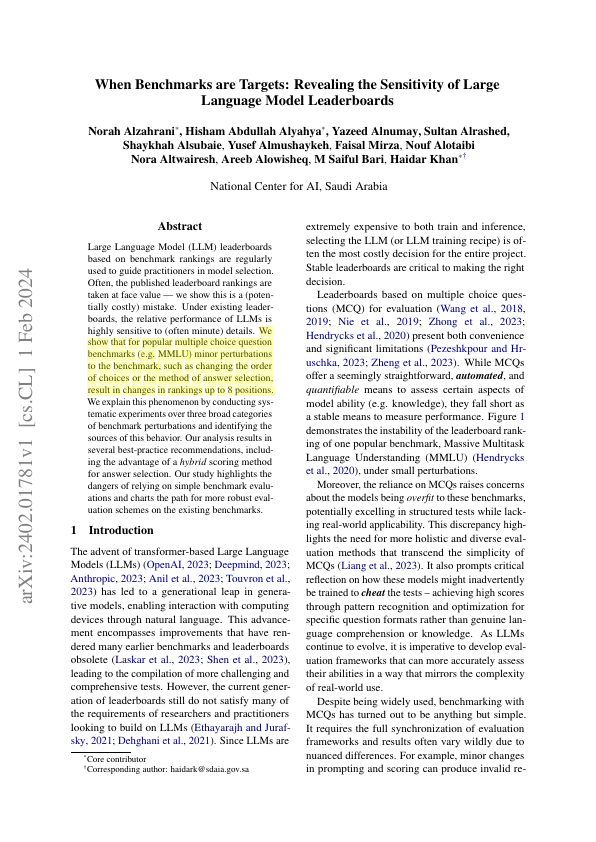

In [102]:
from papermage.visualizers import plot_entities_on_page

page = doc.pages[0]
highlighted = plot_entities_on_page(page.images[0], doc.abstracts[0].sentences[3].tokens, box_width=0, box_alpha=0.3, box_color="yellow")
display(highlighted)